# Treasury Yield Tracker

## Introduction

The project automates the process of downloading Treasury rate data and displaying the past interest rate since year-end 2022.  
It consists of sections for installing necessary libraries such as pandas, matplotlib, and yfinance, downloading the Treasury rate data using yfinance, preprocessing the data for visualization, and creating a line plot to visualize the data.

Source: Yahoo Finance
- ^IRX: 13 week T-Bill
- ^FVX: 5 year Treasury
- ^TNX: 10 year Treasury
- ^TYX: 30 year Treasury

## Requirements and Import
- streamlit
- pandas
- matplotlib
- yfinance
- datetime

In [53]:
import streamlit as st
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Download Treasury rate data

In [54]:
# Download Treasury rate data from Yahoo Finance
#^IRX: 1-Year Eris SOFR Swap Futures,M (YIAH24.CBT)
#^FVX five year Treasury
#^TNX 10 year Treasury
#^TYX 30 year Treasury

treasury_rate_data = yf.download("^IRX ^FVX ^TNX ^TYX", start="2022-12-29", end=None)
# Get today's date in the desired format
todays_date = datetime.now().strftime('%Y-%m-%d')

[*********************100%%**********************]  4 of 4 completed


In [55]:
# The downloaded Treasury rate data
df = treasury_rate_data["Adj Close"]
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 285 entries, 2022-12-29 to 2024-02-16
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^FVX    285 non-null    float64
 1   ^IRX    285 non-null    float64
 2   ^TNX    285 non-null    float64
 3   ^TYX    285 non-null    float64
dtypes: float64(4)
memory usage: 11.1 KB
Ticker       ^FVX   ^IRX   ^TNX   ^TYX
Date                                  
2022-12-29  3.955  4.295  3.835  3.924
2022-12-30  4.000  4.260  3.879  3.975
2023-01-03  3.945  4.255  3.793  3.893
2023-01-04  3.875  4.400  3.709  3.820
2023-01-05  3.910  4.498  3.720  3.798
...           ...    ...    ...    ...
2024-02-12  4.128  5.228  4.172  4.370
2024-02-13  4.318  5.233  4.316  4.466
2024-02-14  4.245  5.218  4.267  4.448
2024-02-15  4.217  5.218  4.240  4.421
2024-02-16  4.288  5.223  4.295  4.448

[285 rows x 4 columns]


## Visualize the data

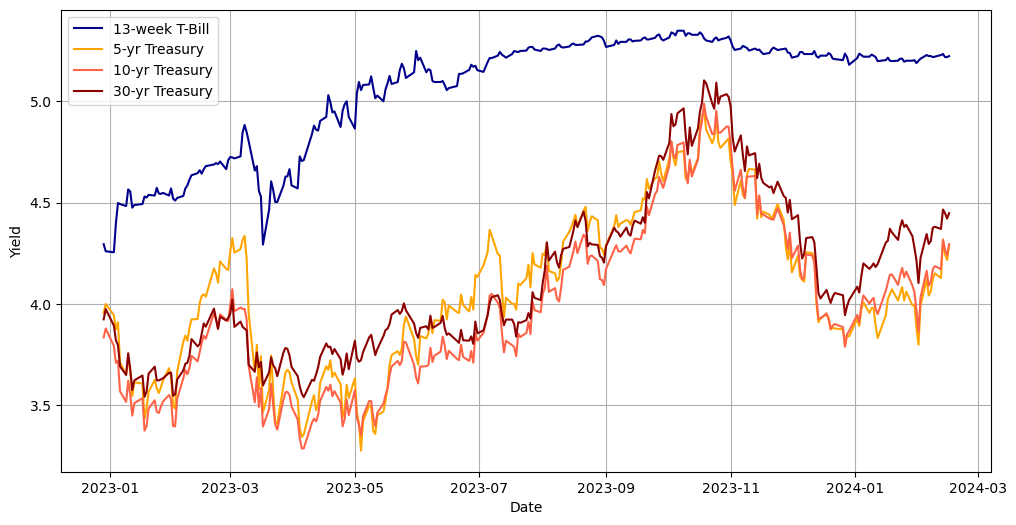

In [56]:
# Plotting the data
is_streamlit = False

if is_streamlit == True:
    # Streamlit application starts here
    st.title('Treasury Yield Tracker')
    
    # Plotting the data with Streamlit
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['^IRX'], label='13-week T-Bill', color='darkblue')
    ax.plot(df.index, df['^FVX'], label='5-yr Treasury', color='orange')
    ax.plot(df.index, df['^TNX'], label='10-yr Treasury', color='tomato')
    ax.plot(df.index, df['^TYX'], label='30-yr Treasury', color='darkred')
    ax.set_xlabel('Date')
    ax.set_ylabel('Yield')
    ax.legend()
    ax.grid(True)
    
    # Use Streamlit's method to display the figure
    st.pyplot(fig)

else:
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['^IRX'], label='13-week T-Bill', color='darkblue')
    plt.plot(df.index, df['^FVX'], label='5-yr Treasury', color='orange')
    plt.plot(df.index, df['^TNX'], label='10-yr Treasury', color='tomato')
    plt.plot(df.index, df['^TYX'], label='30-yr Treasury', color='darkred')
    plt.xlabel('Date')
    plt.ylabel('Yield')
    plt.legend()
    plt.grid(True)
    plt.show()

In [57]:
# Add actual date information
df = df.copy()
df['Actual Date'] = df.index.strftime('%Y-%m-%d')

# Filter for month ends
month_end_data = df.resample('M').last()

# Rename column names
new_column_names = {'^IRX': '13-week T-Bill',
                    '^FVX': '5-yr Treasury',
                    '^TNX': '10-yr Treasury',
                    '^TYX': '30-yr Treasury'}

month_end_data = month_end_data.rename(columns = new_column_names)

# Rerder columns
desired_order = ['Actual Date', '13-week T-Bill', '5-yr Treasury', '10-yr Treasury', '30-yr Treasury']

# Show the filtered DataFrame
if is_streamlit == True:
    st.subheader('Month-End Data Table')
    st.dataframe(month_end_data[desired_order])
    st.write(f"Data source: Yahoo Finance as of {todays_date}")
    st.write("Adjusted Close from Tickers: ^IRX (13-week T-Bill), ^FVX (5-yr Treasury), ^TNX (10-yr Treasury), ^TYX (30-yr Treasury)")
else:
    print(month_end_data[desired_order])

Ticker     Actual Date  13-week T-Bill  5-yr Treasury  10-yr Treasury  \
Date                                                                    
2022-12-31  2022-12-30           4.260          4.000           3.879   
2023-01-31  2023-01-31           4.570          3.638           3.529   
2023-02-28  2023-02-28           4.710          4.168           3.916   
2023-03-31  2023-03-31           4.585          3.611           3.494   
2023-04-30  2023-04-28           4.923          3.536           3.452   
2023-05-31  2023-05-31           5.248          3.743           3.637   
2023-06-30  2023-06-30           5.153          4.133           3.819   
2023-07-31  2023-07-31           5.248          4.179           3.959   
2023-08-31  2023-08-31           5.298          4.244           4.093   
2023-09-30  2023-09-29           5.300          4.606           4.573   
2023-10-31  2023-10-31           5.320          4.816           4.875   
2023-11-30  2023-11-30           5.238          4.2